# India Census 2011 Data Analysis 

In [1]:
# Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
# Read File

excel_url = "https://raw.githubusercontent.com/iamrgyan/Python/main/Census_2011_5_Sept.xlsx"

# Read the Excel File into a pandas Dataframe
df=pd.read_excel(excel_url)

In [3]:
df.head(10)

,State,District,Subdistt,Town/Village,Ward,EB,Level,Name,TRU,No_HH,...,MARG_AL_0_3_F,MARG_HH_0_3_P,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_P,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_P,NON_WORK_M,NON_WORK_F
0,0,0,0,0,0,0,India,India,Total,249501663,...,5820403,1420348,491424,928924,5518450,3082613,2435837,728966109,291330383,437635726
1,0,0,0,0,0,0,India,India,Rural,168612897,...,5640822,1154975,386077,768898,3803400,1972348,1831052,485005760,200944045,284061715
2,0,0,0,0,0,0,India,India,Urban,80888766,...,179581,265373,105347,160026,1715050,1110265,604785,243960349,90386338,153574011
3,1,0,0,0,0,0,STATE,JAMMU & KASHMIR,Total,2119718,...,44570,26585,6780,19805,108457,56880,51577,8218589,3445572,4773017
4,1,0,0,0,0,0,STATE,JAMMU & KASHMIR,Rural,1553433,...,40936,21963,5757,16206,89232,45625,43607,5994979,2562471,3432508
5,1,0,0,0,0,0,STATE,JAMMU & KASHMIR,Urban,566285,...,3634,4622,1023,3599,19225,11255,7970,2223610,883101,1340509
6,2,0,0,0,0,0,STATE,HIMACHAL PRADESH,Total,1483280,...,13195,7676,2959,4717,53557,29186,24371,3305180,1438500,1866680
7,2,0,0,0,0,0,STATE,HIMACHAL PRADESH,Rural,1312510,...,13026,7407,2842,4565,50852,27470,23382,2886666,1273987,1612679
8,2,0,0,0,0,0,STATE,HIMACHAL PRADESH,Urban,170770,...,169,269,117,152,2705,1716,989,418514,164513,254001
9,3,0,0,0,0,0,STATE,PUNJAB,Total,5513071,...,64004,19813,8061,11752,133220,81639,51581,17845976,6565308,11280668


In [4]:
# Explore Data

df.shape

(108, 94)

In [5]:
# Data Cleaning

distinct_state = df['State'].nunique()
count_state = df['State'].value_counts()

distinct_district = df['District'].nunique()
count_district = df['District'].value_counts()

distinct_subdistrict = df['Subdistt'].nunique()
count_subdistrict = df['Subdistt'].value_counts()

distinct_tv = df['Town/Village'].nunique()
count_tv = df['Town/Village'].value_counts()

distinct_ward = df['Ward'].nunique()
count_ward = df['Ward'].value_counts()

distinct_eb = df['EB'].nunique()
count_eb = df['EB'].value_counts()

print('State - {} unique value found {} times each'.format(distinct_state,count_state[0]))
print('District - {} unique value found {} times'.format(distinct_district,count_district[0]))
print('Sub District - {} unique value found {} times'.format(distinct_subdistrict,count_subdistrict[0]))
print('Town/Village - {} unique value found {} times'.format(distinct_tv,count_tv[0]))
print('Ward - {} unique value found {} times'.format(distinct_ward,count_ward[0]))
print('EB - {} unique value found {} times'.format(distinct_eb,count_eb[0]))

State - 36 unique value found 3 times each
District - 1 unique value found 108 times
Sub District - 1 unique value found 108 times
Town/Village - 1 unique value found 108 times
Ward - 1 unique value found 108 times
EB - 1 unique value found 108 times


In [6]:
# Drop columns that has no use further.

df.drop(['District','Subdistt','Town/Village','Ward','EB'], axis=1, inplace = True)

In [7]:
df.head(3)

,State,Level,Name,TRU,No_HH,TOT_P,TOT_M,TOT_F,P_06,M_06,...,MARG_AL_0_3_F,MARG_HH_0_3_P,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_P,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_P,NON_WORK_M,NON_WORK_F
0,0,India,India,Total,249501663,1210854977,623270258,587584719,164515253,85752254,...,5820403,1420348,491424,928924,5518450,3082613,2435837,728966109,291330383,437635726
1,0,India,India,Rural,168612897,833748852,427781058,405967794,121322865,63084449,...,5640822,1154975,386077,768898,3803400,1972348,1831052,485005760,200944045,284061715
2,0,India,India,Urban,80888766,377106125,195489200,181616925,43192388,22667805,...,179581,265373,105347,160026,1715050,1110265,604785,243960349,90386338,153574011


In [8]:
df.shape

(108, 89)

In [9]:
df.describe()

,State,No_HH,TOT_P,TOT_M,TOT_F,P_06,M_06,F_06,P_SC,M_SC,...,MARG_AL_0_3_F,MARG_HH_0_3_P,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_P,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_P,NON_WORK_M,NON_WORK_F
count,108.000000,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,...,1.080000e+02,1.080000e+02,108.000000,108.000000,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02
mean,17.500000,9.240802e+06,4.484648e+07,2.308408e+07,2.176240e+07,6.093158e+06,3.176009e+06,2.917148e+06,7.458458e+06,3.834641e+06,...,2.155705e+05,5.260548e+04,18200.888889,34404.592593,2.043870e+05,1.141709e+05,9.021619e+04,2.699874e+07,1.079001e+07,1.620873e+07
std,10.436725,2.978611e+07,1.454183e+08,7.483771e+07,7.058281e+07,2.013171e+07,1.048929e+07,9.642602e+06,2.496560e+07,1.284436e+07,...,7.902002e+05,1.822264e+05,63021.554301,119549.418755,6.627652e+05,3.673326e+05,2.975969e+05,8.728337e+07,3.511772e+07,5.219555e+07
min,0.000000,2.710000e+03,1.414100e+04,7.243000e+03,6.898000e+03,1.815000e+03,9.500000e+02,8.650000e+02,0.000000e+00,0.000000e+00,...,0.000000e+00,3.000000e+00,1.000000,2.000000,1.720000e+02,9.200000e+01,6.100000e+01,9.488000e+03,3.456000e+03,6.032000e+03
25%,8.750000,2.056265e+05,8.932988e+05,4.521790e+05,4.411198e+05,9.321425e+04,4.757825e+04,4.569550e+04,1.701325e+04,8.866000e+03,...,1.158250e+03,6.175000e+02,242.500000,387.750000,4.822250e+03,2.685750e+03,2.106000e+03,5.530212e+05,2.040728e+05,3.229175e+05
50%,17.500000,1.683600e+06,8.975082e+06,4.747602e+06,4.227479e+06,1.113163e+06,6.043580e+05,5.088050e+05,1.308308e+06,6.891275e+05,...,1.009800e+04,6.762000e+03,2305.000000,4637.000000,4.603750e+04,2.929500e+04,1.594450e+04,5.961843e+06,2.386978e+06,3.527454e+06
75%,26.250000,7.785008e+06,3.475032e+07,1.749073e+07,1.738008e+07,4.519701e+06,2.319260e+06,2.200172e+06,5.253306e+06,2.767918e+06,...,1.159655e+05,3.264050e+04,10765.500000,21844.000000,1.582865e+05,8.345850e+04,6.726450e+04,1.939363e+07,7.586364e+06,1.186848e+07
max,35.000000,2.495017e+08,1.210855e+09,6.232703e+08,5.875847e+08,1.645153e+08,8.575225e+07,7.876300e+07,2.013784e+08,1.035353e+08,...,5.820403e+06,1.420348e+06,491424.000000,928924.000000,5.518450e+06,3.082613e+06,2.435837e+06,7.289661e+08,2.913304e+08,4.376357e+08


In [10]:
pd.isnull(df).sum()

State            0
Level            0
Name             0
TRU              0
No_HH            0
                ..
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_P       0
NON_WORK_M       0
NON_WORK_F       0
Length: 89, dtype: int64

In [11]:
df.columns

Index(['State', 'Level', 'Name', 'TRU', 'No_HH', 'TOT_P', 'TOT_M', 'TOT_F',
       'P_06', 'M_06', 'F_06', 'P_SC', 'M_SC', 'F_SC', 'P_ST', 'M_ST', 'F_ST',
       'P_LIT', 'M_LIT', 'F_LIT', 'P_ILL', 'M_ILL', 'F_ILL', 'TOT_WORK_P',
       'TOT_WORK_M', 'TOT_WORK_F', 'MAINWORK_P', 'MAINWORK_M', 'MAINWORK_F',
       'MAIN_CL_P', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_P', 'MAIN_AL_M',
       'MAIN_AL_F', 'MAIN_HH_P', 'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_P',
       'MAIN_OT_M', 'MAIN_OT_F', 'MARGWORK_P', 'MARGWORK_M', 'MARGWORK_F',
       'MARG_CL_P', 'MARG_CL_M', 'MARG_CL_F', 'MARG_AL_P', 'MARG_AL_M',
       'MARG_AL_F', 'MARG_HH_P', 'MARG_HH_M', 'MARG_HH_F', 'MARG_OT_P',
       'MARG_OT_M', 'MARG_OT_F', 'MARGWORK_3_6_P', 'MARGWORK_3_6_M',
       'MARGWORK_3_6_F', 'MARG_CL_3_6_P', 'MARG_CL_3_6_M', 'MARG_CL_3_6_F',
       'MARG_AL_3_6_P', 'MARG_AL_3_6_M', 'MARG_AL_3_6_F', 'MARG_HH_3_6_P',
       'MARG_HH_3_6_M', 'MARG_HH_3_6_F', 'MARG_OT_3_6_P', 'MARG_OT_3_6_M',
       'MARG_OT_3_6_F', 'MARGWORK_0

In [12]:
# Add New Column Above 6 Years as "A_06", and Non SC ST as "Non_SCST"

df['A_06'] = df.loc[:, 'TOT_P'] - df.loc[:, 'P_06']
df['Non_SCST'] = df.loc[:,'TOT_P'] - (df.loc[:,'P_SC'] + df.loc[:,'P_ST'])

## Exploratory Data Analysis

Define the data structure of data set


Column wise data set is divided into the groups of Gender, Education, Employment, Age, Caste, and Household.  
Further, subgrouped under the main group like - Male, Female, Literates, Illiterates etc...  
Row wise the data is primarily grouped in two parts (i) India, and (ii) State.  
Further sub grouped into (i) Total, (ii) Rural, and (iii) Urban

#### 1 - India - Population Data Distribution

##### A. Sub-Categories
Gender(Male, Female), Literacy(Literate, Illiterate), Employment(Worker, Non Worker), Age(Above 6 Years, Under 6 Years)
Ethnicity and Races(Schedule Catse, Schedule Tribes, Non SC & ST).  
##### B. Sub-Categories - Percentage value of sub-categories against total population
##### C. Sub-Categories - Urban & Rural
##### D. Sub-categories proportion withing Rural & Urban Space

In [13]:
# Create Sub-categories Label &  Values
one_label = ['Population', 'Male','Female', 'Literate', 'Illiterate','Non Worker', 'Worker', 'Under 6 Years','Above 6 Years','Schedule Caste','Schedule Tribes','Non SC&ST', 'HouseHold']
india_total = df.loc[0,['TOT_P','TOT_M','TOT_F','P_LIT','P_ILL','NON_WORK_P','TOT_WORK_P','P_06','A_06','P_SC','P_ST','Non_SCST','No_HH']]
india_rural = df.loc[1,['TOT_P','TOT_M','TOT_F','P_LIT','P_ILL','NON_WORK_P','TOT_WORK_P','P_06','A_06','P_SC','P_ST','Non_SCST','No_HH']]
india_urban = df.loc[2,['TOT_P','TOT_M','TOT_F','P_LIT','P_ILL','NON_WORK_P','TOT_WORK_P','P_06','A_06','P_SC','P_ST','Non_SCST','No_HH']]

# Proportion Calculation
india_percent = (india_total/df['TOT_P'].values[0])
rural_proportion = india_rural/india_total
urban_proportion = india_urban/india_total

In [14]:
# Convert the Numbers in Million format
# Function to format numbers in Million
def format_in_million(value):
    return f'{value / 1000000:.1f}'

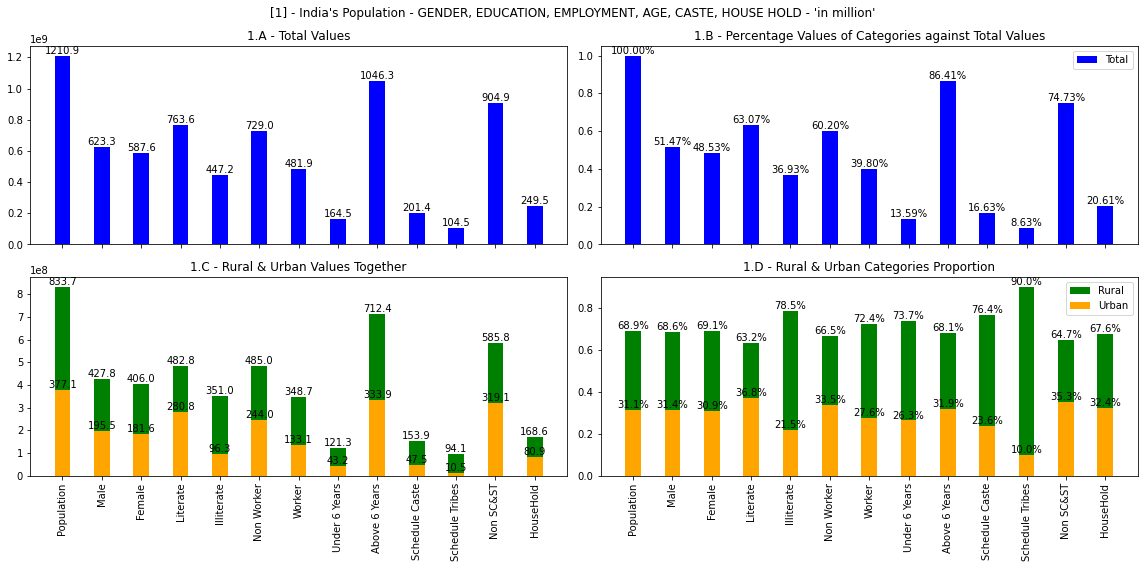

In [15]:
# Create a 2x2 grid for subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 8), sharex=True)

plt.suptitle("[1] - India\'s Population - GENDER, EDUCATION, EMPLOYMENT, AGE, CASTE, HOUSE HOLD - 'in million'")

# Set width for each bar
bar_width = 0.4

# 1. Bar Chart - India's Total Population
for i, v in enumerate(india_total):
    axes[0, 0].bar(one_label[i], v, width=bar_width, color='blue')
    axes[0, 0].text(i, v, format_in_million(v), ha='center', va='bottom', rotation=0)
axes[0, 0].set_title("1.A - Total Values")
# axes[0, 0].tick_params(axis='x', rotation=90)  # Rotate x-tick labels

# 2. Bar Chart - India's Total Population Vs Total Rural and Urban Population together
for i, v in enumerate(india_percent):
    axes[0, 1].bar(one_label[i], v, width=bar_width, color='blue')
    axes[0, 1].text(i, v, f'{v:.2%}', ha='center', va='bottom', rotation=0)
axes[0, 1].set_title("1.B - Percentage Values of Categories against Total Values")
# axes[0, 1].tick_params(axis='x', rotation=90)

# 3. Bar Chart - Rural & Urban Population together 
for i, v in enumerate(india_rural):
    axes[1, 0].bar(one_label[i], v, width=bar_width, color='green')
    axes[1, 0].text(i, v, format_in_million(v), ha='center', va='bottom', rotation=0)
for i, v in enumerate(india_urban):
    axes[1, 0].bar(one_label[i], v, width=bar_width, color='orange')
    axes[1, 0].text(i, v, format_in_million(v), ha='center', va='bottom', rotation=0)

# axes[1, 1].tick_params(axis='x', rotation=90)  # Rotate x-tick labels
axes[1, 0].set_title("1.C - Rural & Urban Values Together")
axes[1, 0].tick_params(axis='x', rotation=90)  # Rotate x-tick labels

# 4. Bar Chart - Rural & Urban percentage value against total
for i, (rural_prop, urban_prop) in enumerate(zip(rural_proportion, urban_proportion)):
    axes[1, 1].bar(one_label[i], rural_prop, width=bar_width, color='green')
    axes[1, 1].bar(one_label[i], urban_prop, width=bar_width, color='orange')
    axes[1, 1].text(i, rural_prop, f'{rural_prop:.1%}', ha='center', va='bottom', rotation=0)
    axes[1, 1].text(i, urban_prop, f'{urban_prop:.1%}', ha='center', va='bottom', rotation=0)
axes[1, 1].set_title('1.D - Rural & Urban Categories Proportion')
axes[1, 1].tick_params(axis='x', rotation=90)

axes[0, 1].legend(['Total'], loc='upper right')
axes[1, 1].legend(['Rural', 'Urban'], loc='upper right')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.4)  # Adjust the spacing as desired

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

#### 2 - States - Population Data Distribution

##### A. State Wise Total Population  
##### B. State Wise Rural Population  
##### C. State Wise urban Population  
##### D. Sub-categories proportion withing Rural & Urban Space

In [16]:
# Create State Data Info
state_total = df[(df['Level']=='STATE') & (df['TRU'].isin(['Total']))]
state_rural = df[(df['Level']=='STATE') & (df['TRU'].isin(['Rural']))]
state_urban = df[(df['Level']=='STATE') & (df['TRU'].isin(['Urban']))]

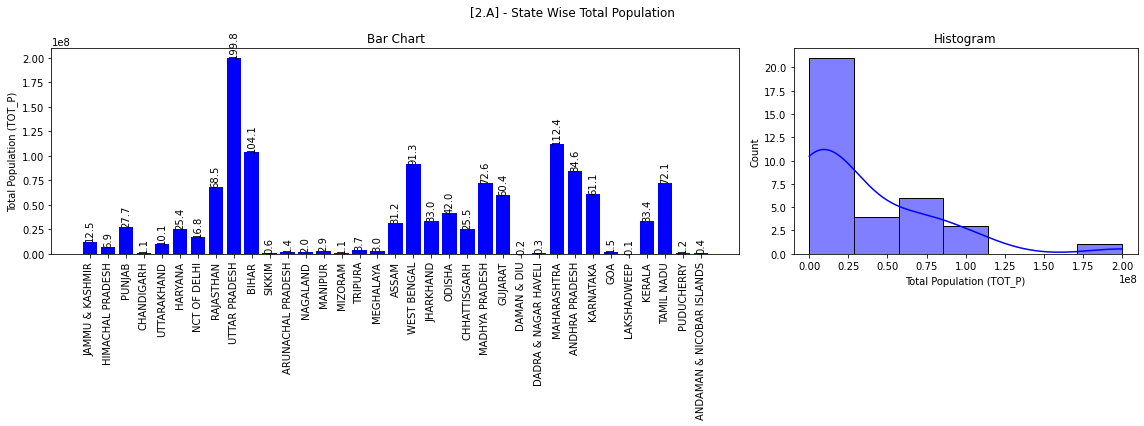

In [17]:
# A. Examining the State Total Population

fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [2, 1]})
plt.suptitle('[2.A] - State Wise Total Population')

# Bar chart - State Total
axes[0].bar(state_total['Name'], state_total['TOT_P'], color='blue')
axes[0].set_ylabel('Total Population (TOT_P)')
axes[0].set_title('Bar Chart')
axes[0].tick_params(axis='x', rotation=90)

for i, v in enumerate(state_total['TOT_P']):
    axes[0].text(i, v, format_in_million(v), ha='center', va='bottom', rotation=90)

# Histogram
sns.histplot(state_total['TOT_P'], kde=True, color='blue', ax=axes[1])
axes[1].set_xlabel('Total Population (TOT_P)')
axes[1].set_title('Histogram')

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

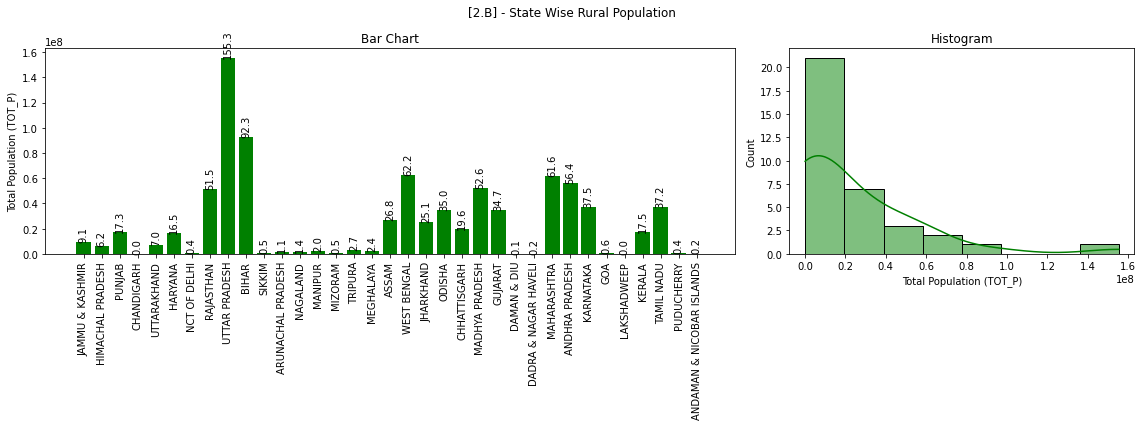

In [18]:
# B. Examining the State Rural Population
fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [2, 1]})
plt.suptitle('[2.B] - State Wise Rural Population')

# Bar chart - State Total
axes[0].bar(state_rural['Name'], state_rural['TOT_P'], color='green')
axes[0].set_ylabel('Total Population (TOT_P)')
axes[0].set_title('Bar Chart')
axes[0].tick_params(axis='x', rotation=90)

for i, v in enumerate(state_rural['TOT_P']):
    axes[0].text(i, v, format_in_million(v), ha='center', va='bottom', rotation=90)

# Histogram
sns.histplot(state_rural['TOT_P'], kde=True, color='green', ax=axes[1])
axes[1].set_xlabel('Total Population (TOT_P)')
axes[1].set_title('Histogram')

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

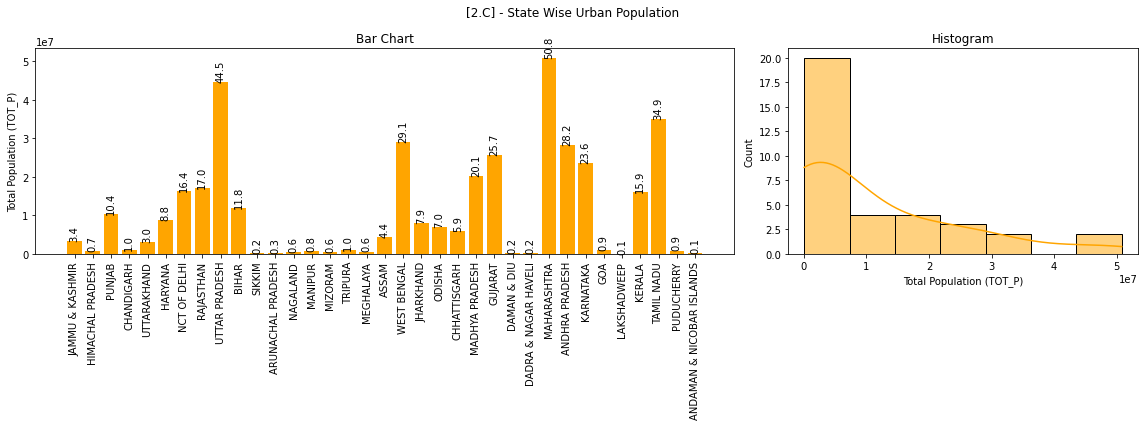

In [19]:
# C. Examining the State Urban Population
fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [2, 1]})
plt.suptitle('[2.C] - State Wise Urban Population')

# Bar chart - State Total
axes[0].bar(state_urban['Name'], state_urban['TOT_P'], color='orange')
axes[0].set_ylabel('Total Population (TOT_P)')
axes[0].set_title('Bar Chart')
axes[0].tick_params(axis='x', rotation=90)

for i, v in enumerate(state_urban['TOT_P']):
    axes[0].text(i, v, format_in_million(v), ha='center', va='bottom', rotation=90)

# Histogram
sns.histplot(state_urban['TOT_P'], kde=True, color='orange', ax=axes[1])
axes[1].set_xlabel('Total Population (TOT_P)')
axes[1].set_title('Histogram')

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

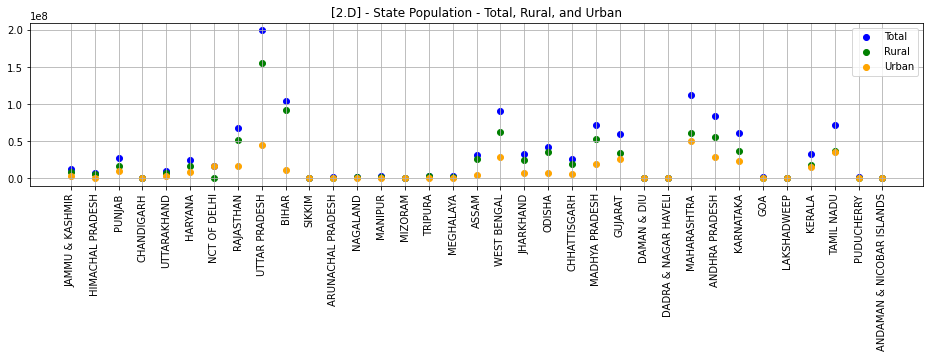

In [20]:
# D. Scatter Chart - State's Total Population Vs Total Rural and Urban Population together
plt.figure(figsize=(16,3))

plt.scatter(state_total['Name'], state_total['TOT_P'], marker='o', color='blue')
plt.scatter(state_total['Name'], state_rural['TOT_P'], marker='o', color='green')
plt.scatter(state_total['Name'], state_urban['TOT_P'], marker='o', color='orange')
plt.grid(True)
plt.title('[2.D] - State Population - Total, Rural, and Urban')
plt.legend(['Total', 'Rural', 'Urban'])

plt.xticks(range(len(state_total['Name'])), state_total['Name'], rotation=90);


#### Q3. Gender

##### A. Male (Literacy, Employment, Age, Ethnicity & Race, Rural & Urban)
##### B. Female (Literacy, Employment, Age, Ethnicity & Race, Rural & Urban)

In [21]:
# 3.A - Male - Add New Column Male Above 6 Years as "MA_06", and Male Non SC ST as "MNon_SCST"
df['MA_06'] = df.loc[:, 'TOT_M'] - df.loc[:, 'M_06']
df['MNon_SCST'] = df.loc[:,'TOT_M'] - (df.loc[:,'M_SC'] + df.loc[:,'M_ST'])

In [22]:
# 3.A - Male
three_mlabel = ['Total Male', 'Literate', 'Illiterate','Non Worker', 'Worker', 'Under 6 Years','Above 6 Years','Schedule Caste','Schedule Tribes','Non SC&ST']
male_total = df.loc[0,['TOT_M','M_LIT','M_ILL','NON_WORK_M','TOT_WORK_M','M_06','MA_06','M_SC','M_ST','MNon_SCST']]
male_rural = df.loc[1,['TOT_M','M_LIT','M_ILL','NON_WORK_M','TOT_WORK_M','M_06','MA_06','M_SC','M_ST','MNon_SCST']]
male_urban = df.loc[2,['TOT_M','M_LIT','M_ILL','NON_WORK_M','TOT_WORK_M','M_06','MA_06','M_SC','M_ST','MNon_SCST']]

# Proportion Calculation
mt_percent = (male_total/df['TOT_M'].values[0])
mt_percent_ind = (male_total/df['TOT_P'].values[0])
mr_proportion = male_rural/male_total
mu_proportion = male_urban/male_total


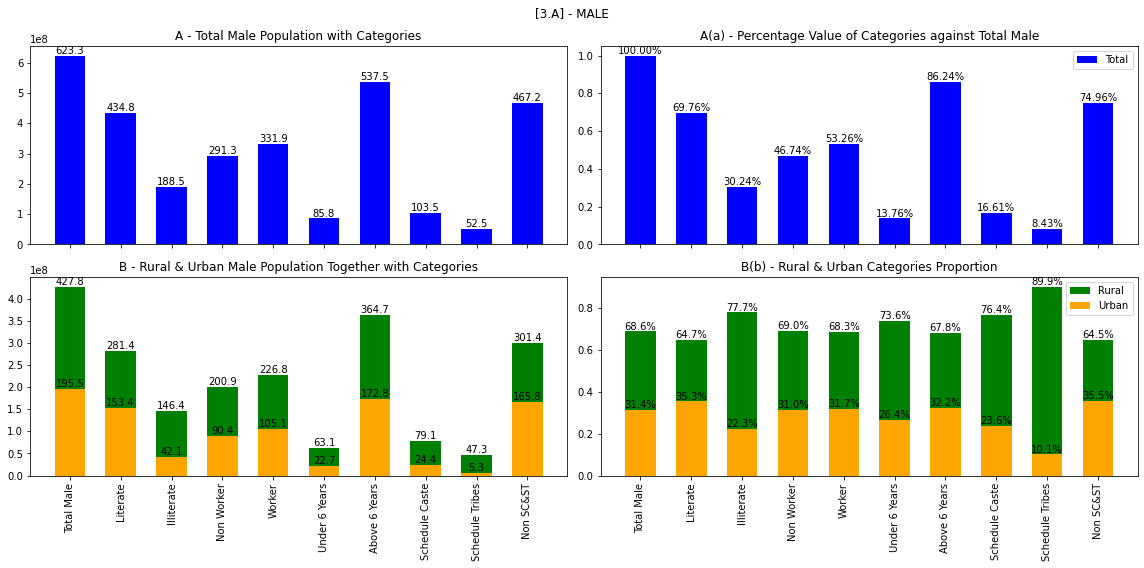

In [23]:
# 3.A - Male 
fig, axes = plt.subplots(2, 2, figsize=(16, 8), sharex=True)

plt.suptitle('[3.A] - MALE')

# Set width for each bar
bar_width = 0.6

# 1. Bar Chart - India's Total Population
for i, v in enumerate(male_total):
    axes[0, 0].bar(three_mlabel[i], v, width=bar_width, color='blue')
    axes[0, 0].text(i, v, format_in_million(v), ha='center', va='bottom', rotation=0)
axes[0, 0].set_title("A - Total Male Population with Categories")
# axes[0, 0].tick_params(axis='x', rotation=90)  # Rotate x-tick labels

# 2. Bar Chart - Individiual groups proportion against total male population
for i, v in enumerate(mt_percent):
    axes[0, 1].bar(three_mlabel[i], v, width=bar_width, color='blue')
    axes[0, 1].text(i, v, f'{v:.2%}', ha='center', va='bottom', rotation=0)
axes[0, 1].set_title("A(a) - Percentage Value of Categories against Total Male")

# 3. Stacked Bar Chart - Rural & Urban Population values
for i, v in enumerate(male_rural):
    axes[1, 0].bar(three_mlabel[i], v, width=bar_width, color='green')
    axes[1, 0].text(i, v, format_in_million(v), ha='center', va='bottom', rotation=0)
# axes[1, 0].set_title("C - Rural Male")
# axes[1, 0].tick_params(axis='x', rotation=90)  # Rotate x-tick labels

# 3. Stacked Bar Chart - 
for i, v in enumerate(male_urban):
    axes[1, 0].bar(three_mlabel[i], v, width=bar_width, color='orange')
    axes[1, 0].text(i, v, format_in_million(v), ha='center', va='bottom', rotation=0)
axes[1, 0].set_title("B - Rural & Urban Male Population Together with Categories")
axes[1, 0].tick_params(axis='x', rotation=90)  # Rotate x-tick labels

# 4. Stacked Bar Chart - Rural & Urban Proportion
for i, (mr_prop, mu_prop) in enumerate(zip(mr_proportion, mu_proportion)):
    axes[1, 1].bar(three_mlabel[i], mr_prop, width=bar_width, color='green')
    axes[1, 1].bar(three_mlabel[i], mu_prop, width=bar_width, color='orange')
    axes[1, 1].text(i, mr_prop, f'{mr_prop:.1%}', ha='center', va='bottom', rotation=0)
    axes[1, 1].text(i, mu_prop, f'{mu_prop:.1%}', ha='center', va='bottom', rotation=0)
axes[1, 1].set_title('B(b) - Rural & Urban Categories Proportion')
axes[1, 1].tick_params(axis='x', rotation=90)

axes[0, 1].legend(['Total'], loc='upper right')
axes[1, 1].legend(['Rural', 'Urban'], loc='upper right')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.4)  # Adjust the spacing as desired

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [24]:
# 3.B - Female - Add New Column Female Above 6 Years as "FA_06", and Female Non SC ST as "FNon_SCST"
df['FA_06'] = df.loc[:, 'TOT_F'] - df.loc[:, 'F_06']
df['FNon_SCST'] = df.loc[:,'TOT_F'] - (df.loc[:,'F_SC'] + df.loc[:,'F_ST'])

In [25]:
# 3.B - Female
three_flabel = ['Total Female', 'Literate', 'Illiterate','Non Worker', 'Worker', 'Under 6 Years','Above 6 Years','Schedule Caste','Schedule Tribes','Non SC&ST']
female_total = df.loc[0,['TOT_F','F_LIT','F_ILL','NON_WORK_F','TOT_WORK_F','F_06','FA_06','F_SC','F_ST','FNon_SCST']]
female_rural = df.loc[1,['TOT_F','F_LIT','F_ILL','NON_WORK_F','TOT_WORK_F','F_06','FA_06','F_SC','F_ST','FNon_SCST']]
female_urban = df.loc[2,['TOT_F','F_LIT','F_ILL','NON_WORK_F','TOT_WORK_F','F_06','FA_06','F_SC','F_ST','FNon_SCST']]

# Proportion Calculation
ft_percent = (female_total/df['TOT_F'].values[0])
fr_proportion = female_rural/female_total
fu_proportion = female_urban/female_total

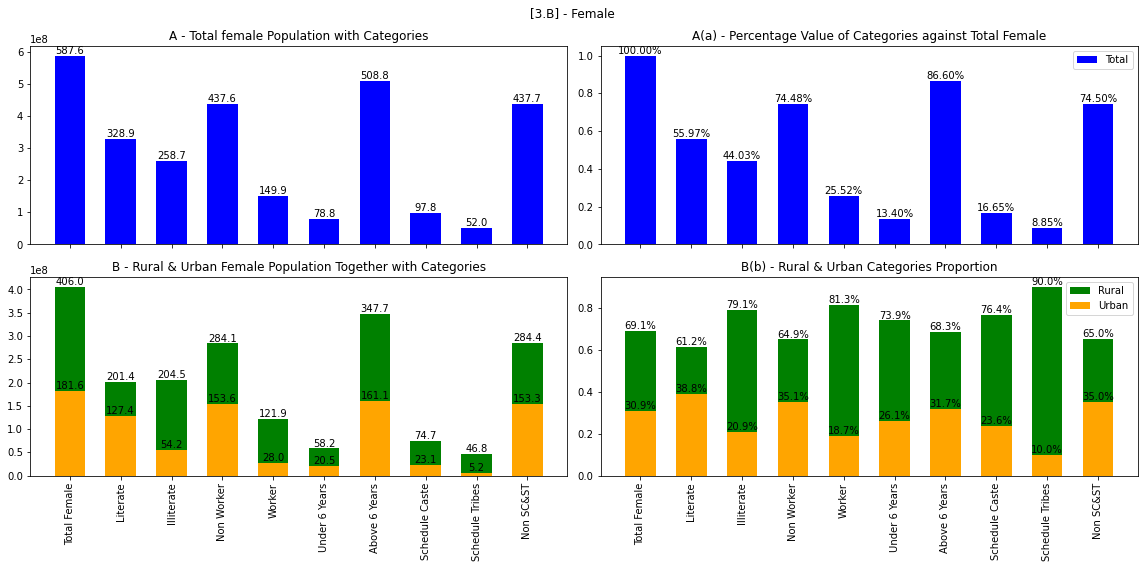

In [26]:
# 3.B - Female
fig, axes = plt.subplots(2, 2, figsize=(16, 8), sharex=True)

plt.suptitle('[3.B] - Female')

# Set width for each bar
bar_width = 0.6

# 1. Bar Chart - India's Total Female Population
for i, v in enumerate(female_total):
    axes[0, 0].bar(three_flabel[i], v, width=bar_width, color='blue')
    axes[0, 0].text(i, v, format_in_million(v), ha='center', va='bottom', rotation=0)
axes[0, 0].set_title("A - Total female Population with Categories")
# axes[0, 0].tick_params(axis='x', rotation=90)  # Rotate x-tick labels

# 2. Stacked Bar Chart
for i, v in enumerate(ft_percent):
    axes[0, 1].bar(three_flabel[i], v, width=bar_width, color='blue')
    axes[0, 1].text(i, v, f'{v:.2%}', ha='center', va='bottom', rotation=0)
axes[0, 1].set_title("A(a) - Percentage Value of Categories against Total Female")

# 3. Bar Chart - Rural & Urban Population
for i, v in enumerate(female_rural):
    axes[1, 0].bar(three_flabel[i], v, width=bar_width, color='green')
    axes[1, 0].text(i, v, format_in_million(v), ha='center', va='bottom', rotation=0)
# axes[1, 0].set_title("C - Rural Male")
# axes[1, 0].tick_params(axis='x', rotation=90)  # Rotate x-tick labels

# 3.1 Bar Chart - Rural & Urban Population
for i, v in enumerate(female_urban):
    axes[1, 0].bar(three_flabel[i], v, width=bar_width, color='orange')
    axes[1, 0].text(i, v, format_in_million(v), ha='center', va='bottom', rotation=0)
axes[1, 0].set_title("B - Rural & Urban Female Population Together with Categories")
axes[1, 0].tick_params(axis='x', rotation=90)  # Rotate x-tick labels

# 4. Bar Chart - Rural & Urban Proportion
for i, (fr_prop, fu_prop) in enumerate(zip(fr_proportion, fu_proportion)):
    axes[1, 1].bar(three_flabel[i], fr_prop, width=bar_width, color='green')
    axes[1, 1].bar(three_flabel[i], fu_prop, width=bar_width, color='orange')
    axes[1, 1].text(i, fr_prop, f'{fr_prop:.1%}', ha='center', va='bottom', rotation=0)
    axes[1, 1].text(i, fu_prop, f'{fu_prop:.1%}', ha='center', va='bottom', rotation=0)
axes[1, 1].set_title('B(b) - Rural & Urban Categories Proportion')
axes[1, 1].tick_params(axis='x', rotation=90)

axes[0, 1].legend(['Total'], loc='upper right')
axes[1, 1].legend(['Rural', 'Urban'], loc='upper right')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.4)  # Adjust the spacing as desired

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

#### 4. Employment

##### A. Type of Worker (Main & Marginal)
##### B. Main Worker Type
##### C. Marginal Worker Type

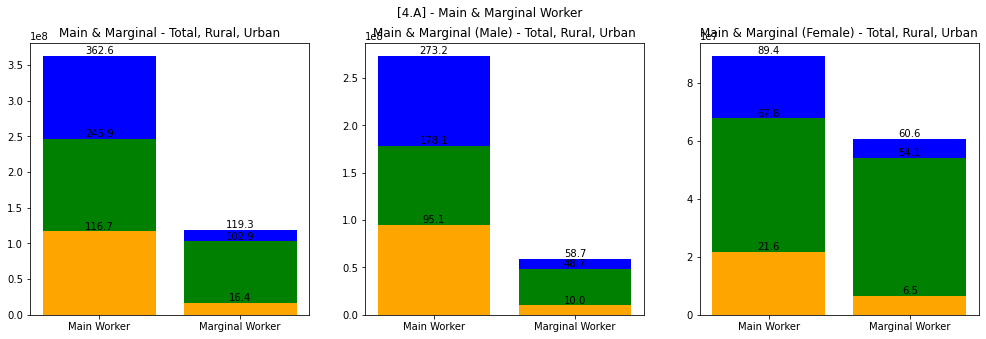

In [27]:
# 4.A - Main & Marginal Worker

four_tlabel = ['Main Worker', 'Marginal Worker']

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17,5))
plt.suptitle('[4.A] - Main & Marginal Worker')
bar_width = 0.5

for i, v in enumerate(df.loc[0,['MAINWORK_P', 'MARGWORK_P']]):
    ax1.bar(four_tlabel[i], v, color='blue')
    ax1.text(i, v, format_in_million(v), ha='center', va='bottom', rotation=0)
    ax1.set_title('Main & Marginal - Total, Rural, Urban')
for i, v in enumerate(df.loc[1,['MAINWORK_P', 'MARGWORK_P']]):
    ax1.bar(four_tlabel[i], v, color='green')
    ax1.text(i, v, format_in_million(v), ha='center', va='bottom', rotation=0)
for i, v in enumerate(df.loc[2,['MAINWORK_P', 'MARGWORK_P']]):
    ax1.bar(four_tlabel[i], v, color='orange')
    ax1.text(i, v, format_in_million(v), ha='center', va='bottom', rotation=0)
    
for i, v in enumerate(df.loc[0,['MAINWORK_M', 'MARGWORK_M']]):
    ax2.bar(four_tlabel[i], v, color='blue')
    ax2.text(i, v, format_in_million(v), ha='center', va='bottom', rotation=0)
    ax2.set_title('Main & Marginal (Male) - Total, Rural, Urban')
for i, v in enumerate(df.loc[1,['MAINWORK_M', 'MARGWORK_M']]):
    ax2.bar(four_tlabel[i], v, color='green')
    ax2.text(i, v, format_in_million(v), ha='center', va='bottom', rotation=0)
for i, v in enumerate(df.loc[2,['MAINWORK_M', 'MARGWORK_M']]):
    ax2.bar(four_tlabel[i], v, color='orange')
    ax2.text(i, v, format_in_million(v), ha='center', va='bottom', rotation=0)

for i, v in enumerate(df.loc[0,['MAINWORK_F', 'MARGWORK_F']]):
    ax3.bar(four_tlabel[i], v, color='blue')
    ax3.text(i, v, format_in_million(v), ha='center', va='bottom', rotation=0)
    ax3.set_title('Main & Marginal (Female) - Total, Rural, Urban')
for i, v in enumerate(df.loc[1,['MAINWORK_F', 'MARGWORK_F']]):
    ax3.bar(four_tlabel[i], v, color='green')
    ax3.text(i, v, format_in_million(v), ha='center', va='bottom', rotation=0)
for i, v in enumerate(df.loc[2,['MAINWORK_F', 'MARGWORK_F']]):
    ax3.bar(four_tlabel[i], v, color='orange')
    ax3.text(i, v, format_in_million(v), ha='center', va='bottom', rotation=0)


plt.show()

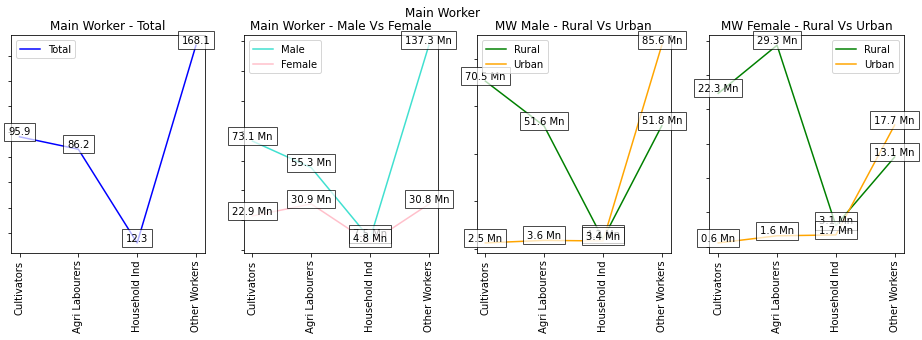

In [29]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 4))

plt.suptitle('Main Worker')

main_label = ['Cultivators', 'Agri Labourers', 'Household Ind','Other Workers']

ax1.plot(main_label, df.loc[0,['MAIN_CL_P','MAIN_AL_P', 'MAIN_HH_P', 'MAIN_OT_P']], color='blue')
for i, v in enumerate(df.loc[0,['MAIN_CL_P','MAIN_AL_P', 'MAIN_HH_P', 'MAIN_OT_P']].values):
    ax1.text(i, v, format_in_million(v), ha='center', va='bottom', bbox=dict(facecolor='white', alpha=0.7))
ax1.set_title('Main Worker - Total')
ax1.tick_params(axis='x', rotation=90)
ax1.grid(False)
ax1.legend(['Total'])
ax1.set_yticklabels([])  # Hide y-axis labels

ax2.plot(main_label, df.loc[0,['MAIN_CL_M','MAIN_AL_M', 'MAIN_HH_M', 'MAIN_OT_M']]/1000000, color='turquoise')
for i, v in enumerate(df.loc[0,['MAIN_CL_M','MAIN_AL_M', 'MAIN_HH_M', 'MAIN_OT_M']].values):
    ax2.text(i,v/1000000, '{:.1f} Mn'.format(v / 1000000), ha='center', va='bottom', bbox=dict(facecolor='white', alpha=0.7))
ax2.plot(main_label, df.loc[0,['MAIN_CL_F','MAIN_AL_F', 'MAIN_HH_F', 'MAIN_OT_F']]/1000000, color='pink')
for i, v in enumerate(df.loc[0,['MAIN_CL_F','MAIN_AL_F', 'MAIN_HH_F', 'MAIN_OT_F']].values):
    ax2.text(i,v/1000000, '{:.1f} Mn'.format(v / 1000000), ha='center', va='bottom', bbox=dict(facecolor='white', alpha=0.7))
ax2.set_title('Main Worker - Male Vs Female')
ax2.tick_params(axis='x', rotation=90)
ax2.grid(False)
ax2.legend(['Male', 'Female'])
ax2.set_yticklabels([])  # Hide y-axis labels

ax3.plot(main_label, df.loc[1,['MAIN_CL_M','MAIN_AL_M', 'MAIN_HH_M', 'MAIN_OT_M']]/1000000, color='green')
for i, v in enumerate(df.loc[1,['MAIN_CL_M','MAIN_AL_M', 'MAIN_HH_M', 'MAIN_OT_M']].values):
    ax3.text(i,v/1000000, '{:.1f} Mn'.format(v / 1000000), ha='center', va='bottom', bbox=dict(facecolor='white', alpha=0.7))
ax3.plot(main_label, df.loc[2,['MAIN_CL_M','MAIN_AL_M', 'MAIN_HH_M', 'MAIN_OT_M']]/1000000, color='orange')
for i, v in enumerate(df.loc[2,['MAIN_CL_M','MAIN_AL_M', 'MAIN_HH_M', 'MAIN_OT_M']].values):
    ax3.text(i,v/1000000, '{:.1f} Mn'.format(v / 1000000), ha='center', va='bottom', bbox=dict(facecolor='white', alpha=0.7))
ax3.set_title('MW Male - Rural Vs Urban')
ax3.tick_params(axis='x', rotation=90)
ax3.grid(False)
ax3.legend(['Rural', 'Urban'])
ax3.set_yticklabels([])  # Hide y-axis labels

ax4.plot(main_label, df.loc[1,['MAIN_CL_F','MAIN_AL_F', 'MAIN_HH_F', 'MAIN_OT_F']]/1000000, color='green')
for i, v in enumerate(df.loc[1,['MAIN_CL_F','MAIN_AL_F', 'MAIN_HH_F', 'MAIN_OT_F']].values):
    ax4.text(i,v/1000000, '{:.1f} Mn'.format(v / 1000000), ha='center', va='bottom', bbox=dict(facecolor='white', alpha=0.7))
ax4.plot(main_label, df.loc[2,['MAIN_CL_F','MAIN_AL_F', 'MAIN_HH_F', 'MAIN_OT_F']]/1000000, color='orange')
for i, v in enumerate(df.loc[2,['MAIN_CL_F','MAIN_AL_F', 'MAIN_HH_F', 'MAIN_OT_F']].values):
    ax4.text(i,v/1000000, '{:.1f} Mn'.format(v / 1000000), ha='center', va='bottom', bbox=dict(facecolor='white', alpha=0.7))
ax4.set_title('MW Female - Rural Vs Urban')
ax4.tick_params(axis='x', rotation=90)
ax4.grid(False)
ax4.legend(['Rural', 'Urban'])
ax4.set_yticklabels([])  # Hide y-axis labels



plt.show()